In [1]:
import vertmodes
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.interpolate import interp1d
from scipy.interpolate import InterpolatedUnivariateSpline

In [2]:
H=200
nz = 40
dz=np.zeros(nz)+H/nz
zp1=np.cumsum(np.insert(dz,0,0))

In [3]:
print(zp1)

[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100. 105. 110. 115. 120. 125. 130. 135.
 140. 145. 150. 155. 160. 165. 170. 175. 180. 185. 190. 195. 200.]


In [4]:
z=0.5*(zp1[:-1]+zp1[1:])
print(z)
print(np.shape(z))

[  2.5   7.5  12.5  17.5  22.5  27.5  32.5  37.5  42.5  47.5  52.5  57.5
  62.5  67.5  72.5  77.5  82.5  87.5  92.5  97.5 102.5 107.5 112.5 117.5
 122.5 127.5 132.5 137.5 142.5 147.5 152.5 157.5 162.5 167.5 172.5 177.5
 182.5 187.5 192.5 197.5]
(40,)


In [5]:
alpha = 2e-4*1000
g=9.8
rhoNil=1022
x = loadmat('density_bk.mat')
rho = x['Sigr'].flatten()
id=np.argwhere(~np.isnan(rho))
rho=rho[id].flatten()
rho_s=np.sort(rho)

In [6]:
p = (x['grid_p'][id]*100).flatten()
TT= 35-(rho_s-1022)/alpha
fT =  interp1d(p,TT,fill_value='extrapolate')
T0 = fT(z)
N1 = 1e-2
T1 = T0.copy()
print(T0)

[85.92201725 50.6893352  36.46354156 31.74820683 31.12493043 28.81501653
 28.48325403 27.99012809 27.52662215 26.91937388 25.94809506 25.84471572
 25.60864375 25.10060074 24.45152388 24.3347042  24.23744091 24.15855878
 24.13254726 24.06181148 24.00510399 23.96052891 23.94406631 23.92501109
 23.92105701 23.91643018 23.87768919 23.8679049  23.86387911 23.85932652
 23.85474268 23.8474674  23.8353964  23.81899132 23.80258624 23.78618117
 23.76977609 23.75337101 23.73696593 23.72056085]


In [7]:
T1[0:4] = 32.7+np.cumsum(N1**2/g/alpha*1000*(-dz[0:4]))
print(T1)

[32.44489796 32.18979592 31.93469388 31.67959184 31.12493043 28.81501653
 28.48325403 27.99012809 27.52662215 26.91937388 25.94809506 25.84471572
 25.60864375 25.10060074 24.45152388 24.3347042  24.23744091 24.15855878
 24.13254726 24.06181148 24.00510399 23.96052891 23.94406631 23.92501109
 23.92105701 23.91643018 23.87768919 23.8679049  23.86387911 23.85932652
 23.85474268 23.8474674  23.8353964  23.81899132 23.80258624 23.78618117
 23.76977609 23.75337101 23.73696593 23.72056085]


In [8]:
print(T0)

[85.92201725 50.6893352  36.46354156 31.74820683 31.12493043 28.81501653
 28.48325403 27.99012809 27.52662215 26.91937388 25.94809506 25.84471572
 25.60864375 25.10060074 24.45152388 24.3347042  24.23744091 24.15855878
 24.13254726 24.06181148 24.00510399 23.96052891 23.94406631 23.92501109
 23.92105701 23.91643018 23.87768919 23.8679049  23.86387911 23.85932652
 23.85474268 23.8474674  23.8353964  23.81899132 23.80258624 23.78618117
 23.76977609 23.75337101 23.73696593 23.72056085]


(20.0, 40.0)

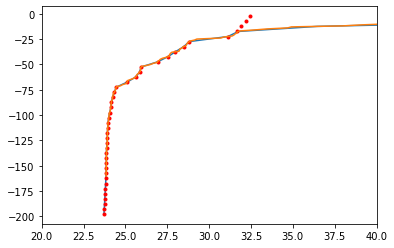

In [9]:
fig,axs=plt.subplots()
axs.plot(T0,-z)
axs.plot(T1,-z,".r")
axs.plot(TT,-p)
axs.set_xlim(20,40)

In [15]:
refTemp=35
rho2=rhoNil*(1-(alpha/1000*(T1-refTemp)))
print(rho2)

[1022.52226286 1022.57440571 1022.62654857 1022.67869143 1022.79206422
 1023.26421062 1023.33202288 1023.43281782 1023.52755843 1023.65167998
 1023.85020937 1023.87134011 1023.91959322 1024.02343721 1024.15610852
 1024.17998646 1024.19986708 1024.21599059 1024.22130734 1024.23576573
 1024.24735675 1024.25646789 1024.25983285 1024.26372773 1024.26453595
 1024.26548167 1024.27340033 1024.27540024 1024.27622311 1024.27715366
 1024.2780906  1024.27957766 1024.28204498 1024.28539817 1024.28875137
 1024.29210457 1024.29545777 1024.29881097 1024.30216416 1024.30551736]


In [16]:
np.diff(rho2)

array([0.05214286, 0.05214286, 0.05214286, 0.11337279, 0.4721464 ,
       0.06781225, 0.10079494, 0.09474061, 0.12412155, 0.19852939,
       0.02113074, 0.04825311, 0.10384399, 0.13267131, 0.02387794,
       0.01988062, 0.01612351, 0.00531675, 0.01445839, 0.01159101,
       0.00911115, 0.00336495, 0.00389489, 0.00080821, 0.00094572,
       0.00791866, 0.00199991, 0.00082287, 0.00093055, 0.00093694,
       0.00148707, 0.00246731, 0.0033532 , 0.0033532 , 0.0033532 ,
       0.0033532 , 0.0033532 , 0.0033532 , 0.0033532 ])

In [17]:
s = InterpolatedUnivariateSpline(z, rho2, k=1)

In [18]:
rhol=s(zp1)
print(rhol)

[1022.49619143 1022.54833429 1022.60047714 1022.65262    1022.73537782
 1023.02813742 1023.29811675 1023.38242035 1023.48018812 1023.5896192
 1023.75094467 1023.86077474 1023.89546666 1023.97151521 1024.08977286
 1024.16804749 1024.18992677 1024.20792883 1024.21864896 1024.22853654
 1024.24156124 1024.25191232 1024.25815037 1024.26178029 1024.26413184
 1024.26500881 1024.269441   1024.27440028 1024.27581167 1024.27668838
 1024.27762213 1024.27883413 1024.28081132 1024.28372157 1024.28707477
 1024.29042797 1024.29378117 1024.29713437 1024.30048757 1024.30384076
 1024.30719396]


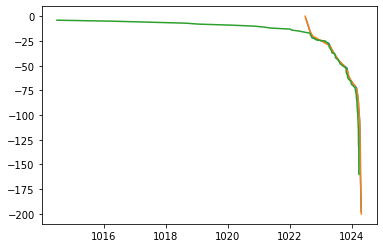

In [19]:
fig,axs=plt.subplots()
axs.plot(rho2,-z)
axs.plot(rhol,-zp1)
axs.plot(rho,-p)

In [20]:
Ns0=g/rhoNil*np.diff(rhol)/dz
print(Ns0)
print(np.shape(Ns0))

[1.00000000e-04 1.00000000e-04 1.00000000e-04 1.58713635e-04
 5.61456761e-04 5.17768575e-04 1.61678133e-04 1.87499848e-04
 2.09867824e-04 3.09391310e-04 2.10633001e-04 6.65324563e-05
 1.45846535e-04 2.26795495e-04 1.50115723e-04 4.19602629e-05
 3.45245030e-05 2.05591541e-05 1.89624692e-05 2.49788827e-05
 1.98513844e-05 1.19633836e-05 6.96149270e-06 4.50982323e-06
 1.68185900e-06 8.50009242e-06 9.51095497e-06 2.70677632e-06
 1.68136226e-06 1.79074001e-06 2.32438656e-06 3.79187063e-06
 5.58131169e-06 6.43079094e-06 6.43079094e-06 6.43079094e-06
 6.43079094e-06 6.43079094e-06 6.43079094e-06 6.43079094e-06]
(40,)


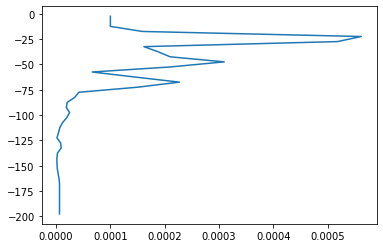

In [21]:
fig,axs=plt.subplots()
axs.plot(Ns0,-z)

In [22]:
print(dz)

[5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]


In [23]:
psi,phi,ce,zph = vertmodes.vertModes(Ns0,dz[0])
print(np.shape(psi))
for i in range(4):
    print('int psi 0 psi %d:  %1.2e'%(i,np.sum(psi[:,0]*psi[:,i]*dz)))

(40, 37)
int psi 0 psi 0:  1.00e+00
int psi 0 psi 1:  -1.08e-13
int psi 0 psi 2:  1.91e-13
int psi 0 psi 3:  -6.27e-14


In [24]:
print(zph)
print(np.shape(zph))

[  2.5   7.5  12.5  17.5  22.5  27.5  32.5  37.5  42.5  47.5  52.5  57.5
  62.5  67.5  72.5  77.5  82.5  87.5  92.5  97.5 102.5 107.5 112.5 117.5
 122.5 127.5 132.5 137.5 142.5 147.5 152.5 157.5 162.5 167.5 172.5 177.5
 182.5 187.5 192.5 197.5]
(40,)


Text(0.5, 0, '$\\psi$: vertical structure')

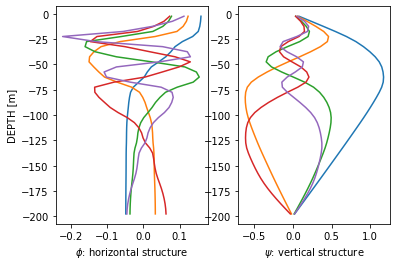

In [25]:
fig,axs=plt.subplots(1,2)
for nn in range(5):
    axs[0].plot(psi[:,nn],-zph)
    axs[1].plot(phi[:,nn],-zph)
axs[0].set_ylabel('DEPTH [m]')
axs[0].set_xlabel('$\phi$: horizontal structure')
axs[1].set_xlabel('$\psi$: vertical structure')

In [ ]:
print(psi[:,3])

In [ ]:
print(psi[:,4])